In [1]:
%matplotlib inline
import numpy as np
from rnn.arch import RNN
from vae.arch import VAE
import matplotlib.pyplot as plt
from gym.utils import seeding

batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
rnn = RNN()
rnn.set_weights('./rnn/weights.h5')

vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
# obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
# action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
# reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
# done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_input = np.load('./data/rnn_input_' + str(batch_num) + '.npy') 
rnn_output = np.load('./data/rnn_output_' + str(batch_num) + '.npy')

In [4]:
rnn_input[0].shape

(299, 35)

In [5]:
rnn_output[0].shape

(299, 34)

In [6]:
GAUSSIAN_MIXTURES = 5
Z_DIM = 32
z_dim = 32

def get_mixture_coef(z_pred):

    log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
    log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

    return log_pi, mu, log_sigma


In [7]:
def get_pi_idx(x, pdf):
  # samples from a categorial distribution
    N = pdf.size
    accumulate = 0
    for i in range(0, N):
        accumulate += pdf[i]
        if (accumulate >= x):
            return i
    random_value = np.random.randint(N)
    #print('error with sampling ensemble, returning random', random_value)
    return random_value

In [8]:
def sample_z(mu, log_sigma):
    z =  mu + (np.exp(log_sigma)) * np_random.randn(*log_sigma.shape)
    return z

In [9]:
np_random, seed = seeding.np_random()

In [10]:
def sample_next_mdn_output(obs):
    
    d = GAUSSIAN_MIXTURES * Z_DIM
    
    y_pred = rnn.model.predict(np.array([[obs]]))
    
    z_pred = y_pred[:,:,:(3*d)]
#     print(z_pred)
    z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])
    
#     print(obs)
#     print(z_pred)

    log_pi, mu, log_sigma = get_mixture_coef(z_pred)
    

    chosen_log_pi = np.zeros(z_dim)
    chosen_mu = np.zeros(z_dim)
    chosen_log_sigma = np.zeros(z_dim)
    
    # adjust temperatures
    logmix2 = np.copy(log_pi)
    logmix2 -= logmix2.max()
    logmix2 = np.exp(logmix2)
    logmix2 /= logmix2.sum(axis=1).reshape(z_dim, 1)

    for j in range(z_dim):
        idx = get_pi_idx(np_random.rand(), logmix2[j])
        idx = 0
        chosen_log_pi[j] = idx
        chosen_mu[j] = mu[j,idx]
        chosen_log_sigma[j] = log_sigma[j,idx]
        
    

    next_z = sample_z(chosen_mu, chosen_log_sigma)

#     reward = np.exp(reward) / (1 + np.exp(reward))
#     done = np.exp(done) / (1 + np.exp(done))

#     if reward > 0.5:
#         next_reward = 3.2
#     else:
#         next_reward = -0.1

#     if done > 0.5:
#         next_done = True
#     else:
#         next_done = False
        
#     return next_z, next_reward, next_done, chosen_mu, chosen_sigma, chosen_pi

    return next_z, chosen_mu, chosen_log_sigma, chosen_log_pi

In [11]:

obs = rnn_input[0]
actual = rnn_output[0] 
print(obs.shape)
print(actual.shape)


idx = 90



(299, 35)
(299, 34)


In [12]:
actual[:,32]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<function matplotlib.pyplot.show>

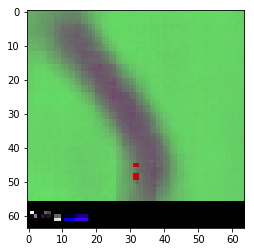

In [13]:
z_decoded = vae.decoder.predict(np.array(obs[:, :32]))
plt.imshow(z_decoded[idx])
plt.show

<function matplotlib.pyplot.show>

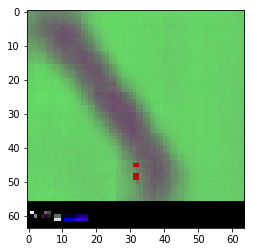

In [14]:
actual_z_decoded = vae.decoder.predict(np.array(actual[:, :32]))
plt.imshow(actual_z_decoded[idx])
plt.show

6.387161606517266
[-0.67400621  0.32869905  0.47575519  1.14478244 -0.87034835  1.4535102
  0.48236721 -0.93167731 -0.07432745 -1.63494142  0.14046136 -0.92453858
 -1.22030084 -0.56638114  1.93697408  0.11744516 -0.03158477  0.46969101
 -0.14221445 -1.34048473  0.30883787 -0.42912846  1.20269932 -0.15767542
 -1.26203359 -0.14442489  0.37872202  0.40570977 -0.98263463  1.9488363
  0.55607029  1.05697577  0.63593704  0.          0.        ]
[-0.04273378  0.55731943  0.5913975   0.35250137 -0.43935655  1.63388534
 -0.06590516  0.94590921 -1.37637663  0.10960489 -0.06958359 -0.56487052
  0.0074054  -0.46522706 -0.05922144 -0.03774562  0.08303537  1.41379402
 -0.64848595 -0.10141373 -0.51761942 -0.73669469  1.58631337 -0.01703237
 -1.24850542  2.715435    0.71403841  0.32555532 -0.46171639 -0.39493315
  0.64005358  0.75294593  0.          0.        ]
[[[-0.10044711]]]
[[[0.09741291]]]
[2.640434  2.6986394 2.7454693 2.849949  2.0492437]


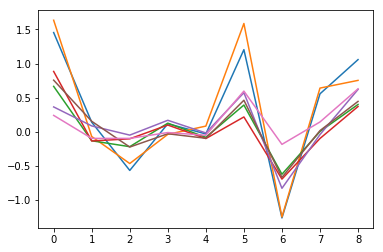

In [15]:
d = GAUSSIAN_MIXTURES * Z_DIM

print(sum(np.abs(obs[idx,[5,10,13,15,16,22, 24, 30, 31]])))
print(obs[idx])
print(actual[idx])
plt.plot(obs[idx,[5,10,13,15,16,22, 24, 30, 31]])
plt.plot(actual[idx,[5,10,13,15,16,22, 24, 30, 31]])
y_pred = rnn.model.predict(np.array([[obs[idx,:]]]))

z_pred = y_pred[:,:,:(3*d)]
rew_pred = y_pred[:,:,(3*d):(3*d+1)]
done_pred = y_pred[:,:,(3*d+1):]

print(rew_pred)
print(done_pred)

z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])

# plt.figure(figsize=(20,20))

# plt.subplot(411)
# plt.plot(z_pred.transpose())

log_pi, mu, log_sigma = np.split(z_pred, 3, 1)

# plt.subplot(412)
# plt.plot(log_pi)

# plt.subplot(412)
plt.plot(mu[[5,10,13,15,16,22, 24, 30, 31]])

# plt.subplot(414)
# plt.plot(log_sigma)


log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

print(sum(np.abs(mu[[5,10,13,15,16,22, 24, 30, 31]])))


In [16]:
next_z = obs[idx,:]

[-0.67400621  0.32869905  0.47575519  1.14478244 -0.87034835  1.4535102
  0.48236721 -0.93167731 -0.07432745 -1.63494142  0.14046136 -0.92453858
 -1.22030084 -0.56638114  1.93697408  0.11744516 -0.03158477  0.46969101
 -0.14221445 -1.34048473  0.30883787 -0.42912846  1.20269932 -0.15767542
 -1.26203359 -0.14442489  0.37872202  0.40570977 -0.98263463  1.9488363
  0.55607029  1.05697577  0.63593704  0.          0.        ]
[-0.83468944 -0.57516996  0.49071939 -0.95828952  0.8391281  -0.67655831
  0.69383777 -0.04360076  0.31982307  0.52566808 -1.06972052 -0.95565205
  0.39008936 -0.23503659  0.1087202  -0.25138448  0.14095199 -1.09561929
  1.20314762  1.41202187  0.74485296  1.16090013  0.09608527  0.27739627
  0.48421541  0.43866424  0.10079666  3.08831302  0.37430123 -0.53632175
 -1.1599278   0.49203818  0.          1.          0.        ]


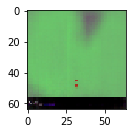

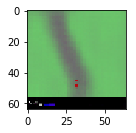

In [17]:
print(next_z)

# next_z, next_reward, next_done, chosen_mu, chosen_sigma, chosen_pi = sample_next_mdn_output(obs)
next_z, chosen_mu, chosen_log_sigma, chosen_pi = sample_next_mdn_output(next_z)
# print(chosen_pi)
# print(chosen_mu)
# print(chosen_log_sigma)
# print(next_z)

next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
next_mu_decoded = vae.decoder.predict(np.array([chosen_mu]))[0]

next_z = np.concatenate([next_z, [0,1,0]])

print(next_z)

plt.subplot(211)
plt.imshow( next_z_decoded)
plt.show()
plt.subplot(221)
plt.imshow( next_mu_decoded)
plt.show()
# plt.imshow(next_z_decoded)
# plt.show()

(34, 299)


/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


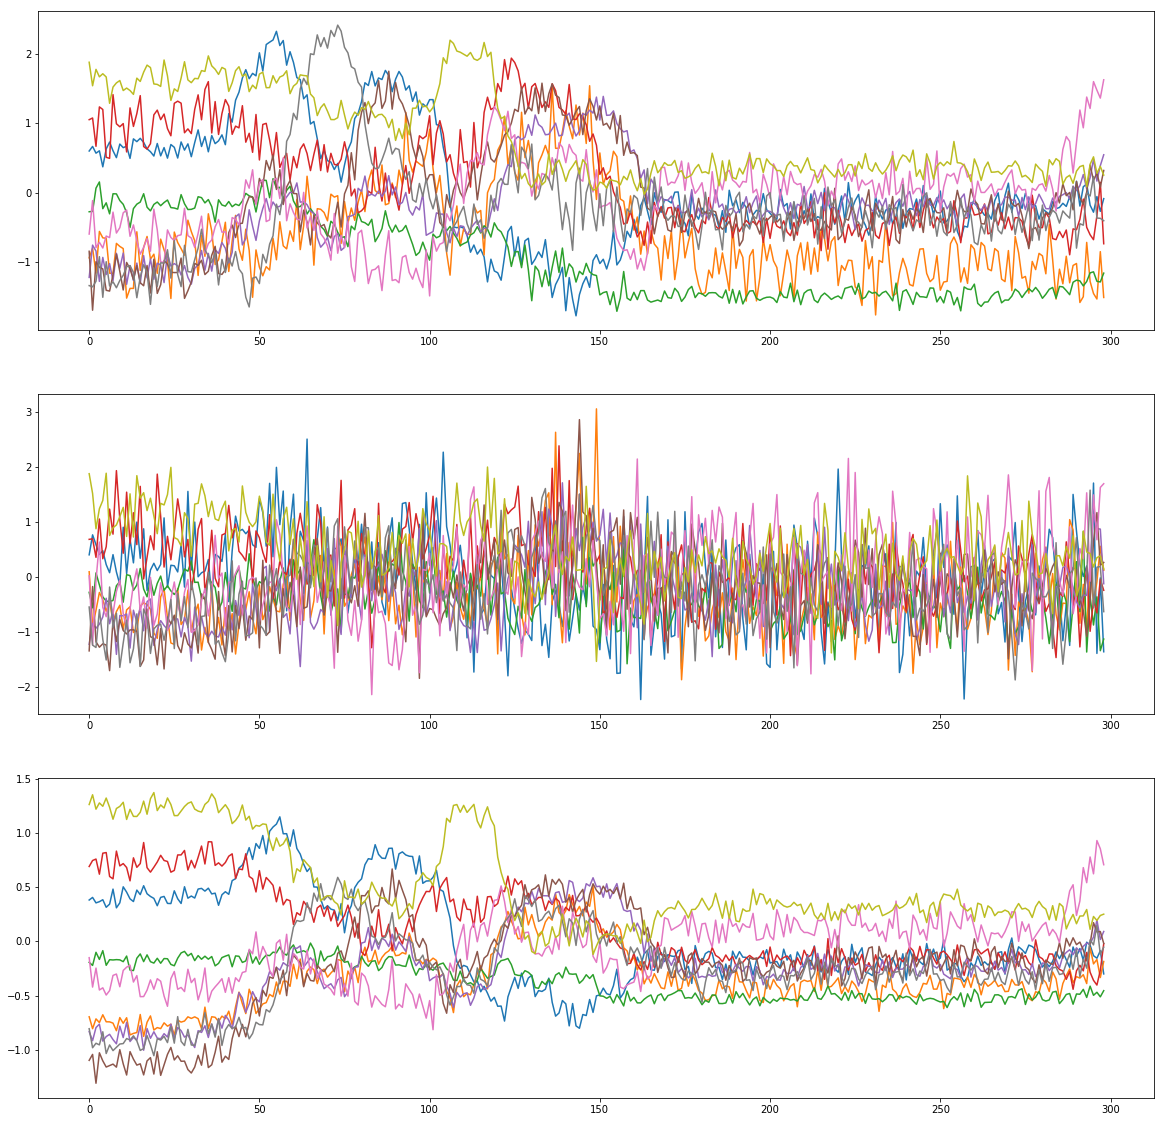

In [18]:
b = np.swapaxes(rnn_output[0],0,1)
print(b.shape)

next_zs = np.zeros(shape = (32,299))
next_mus = np.zeros(shape = (32,299))
# next_z = np.copy(obs)
# print(next_z.shape)
for i in range(299):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi = sample_next_mdn_output(obs[i,:])
    next_mus[:,i] = chosen_mu
    next_zs[:,i] = next_z
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    
    # plt.imshow(next_z_decoded)
    # plt.show()
    # next_z = np.concatenate([next_z, np.array([0,1,0])])

plt.figure(figsize=(20,20))
for i in [5,10,13,15,16,22, 24, 30, 31]:
    plt.subplot(311)
    plt.plot( b[i,:])
    plt.subplot(312)
    plt.plot( next_zs[i,:])
    plt.subplot(313)
    plt.plot( next_mus[i,:])
    
# print(next_zs)
    

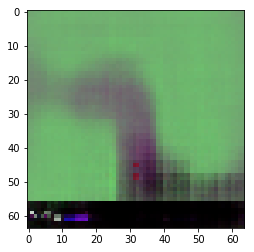

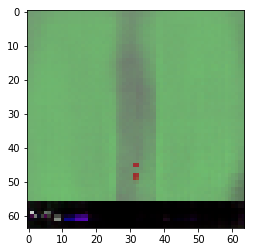

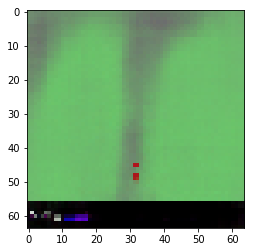

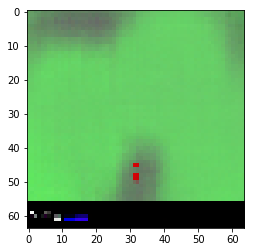

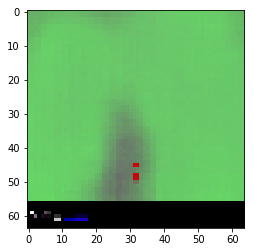

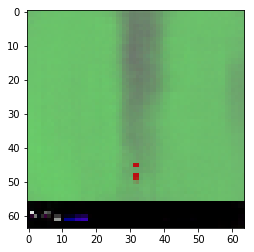

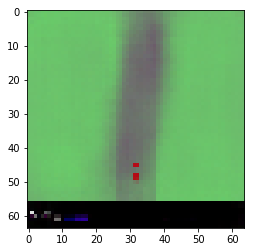

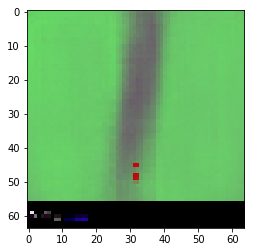

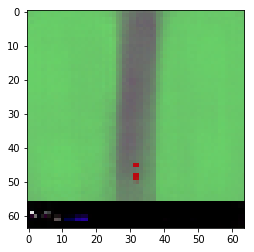

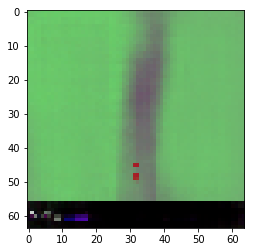

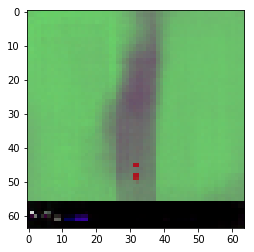

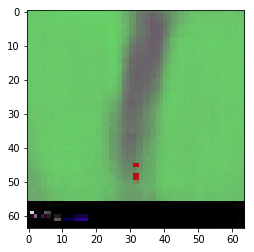

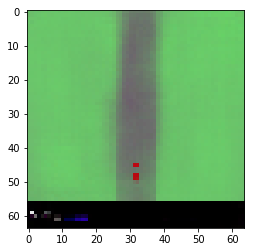

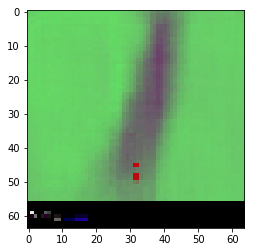

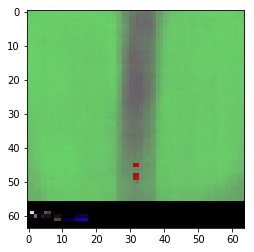

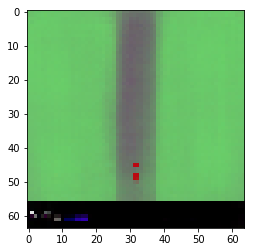

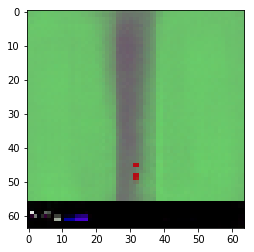

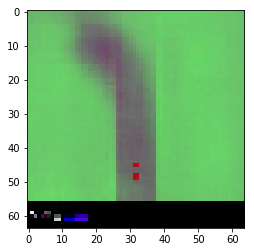

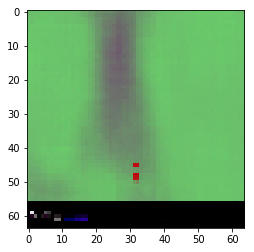

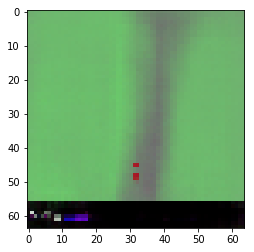

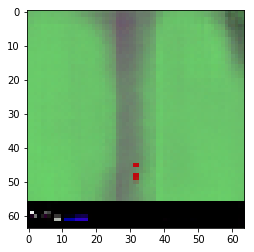

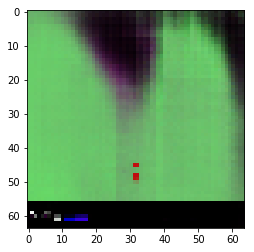

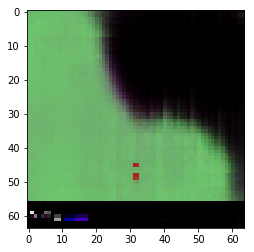

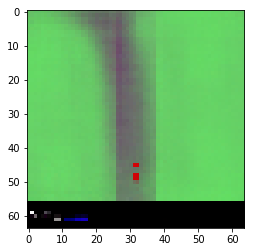

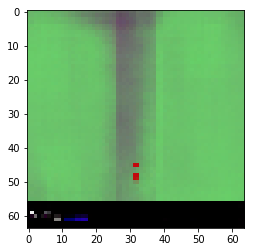

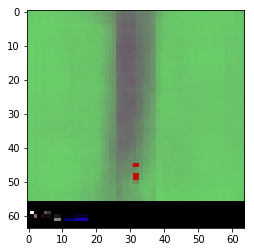

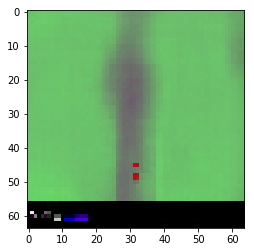

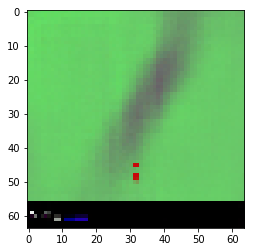

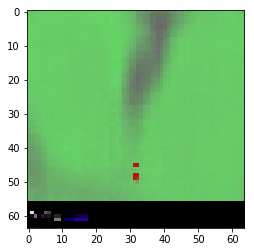

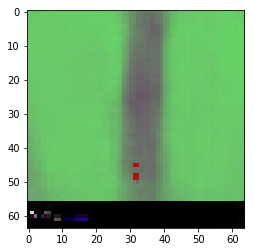

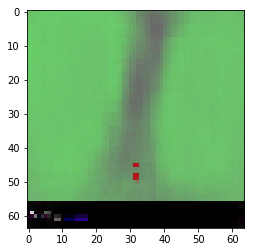

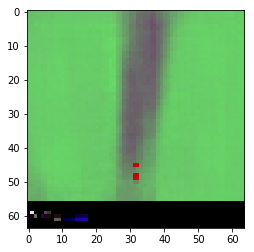

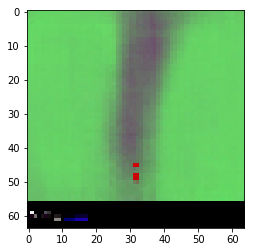

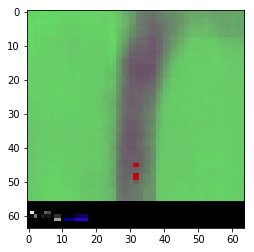

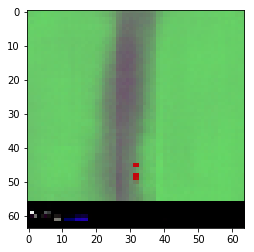

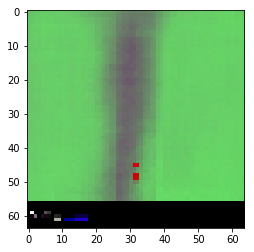

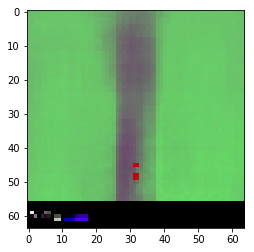

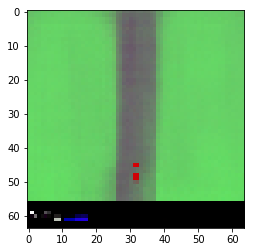

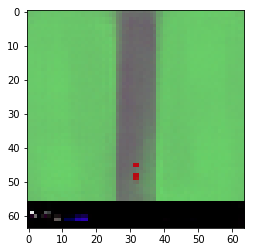

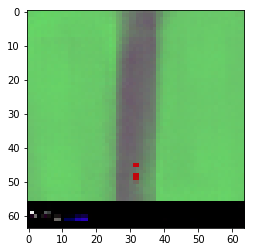

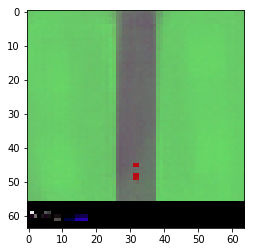

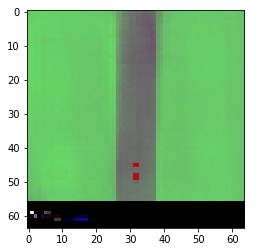

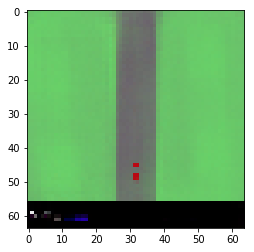

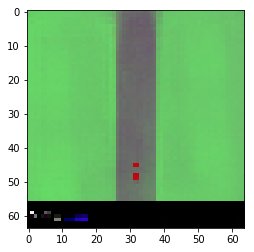

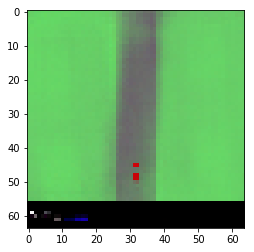

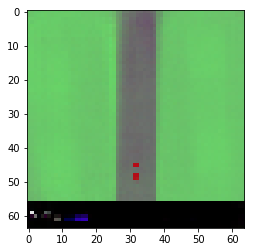

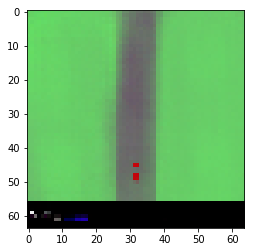

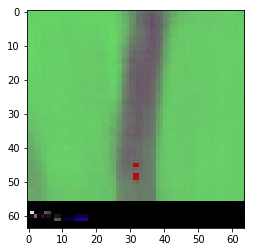

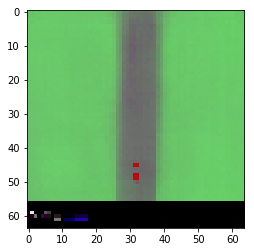

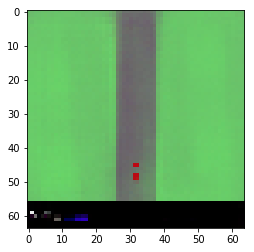

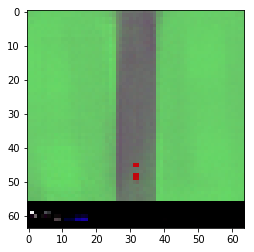

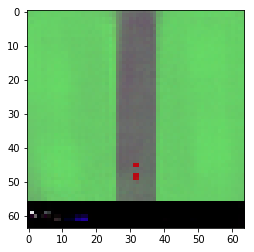

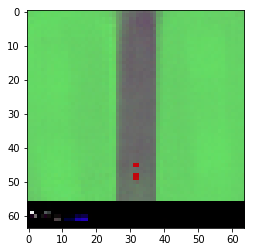

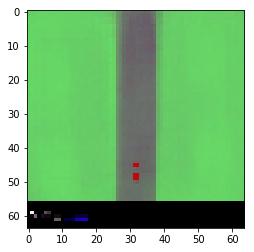

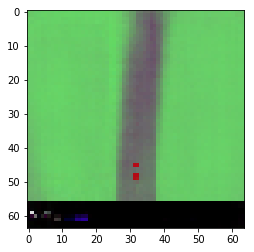

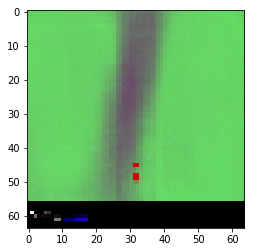

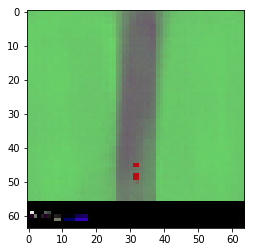

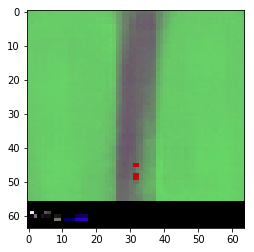

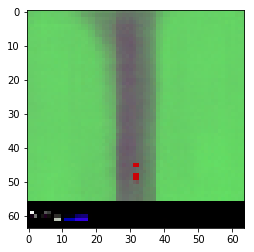

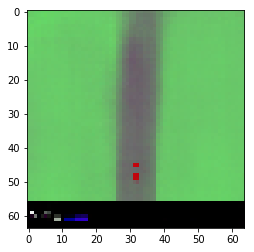

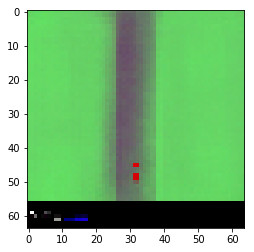

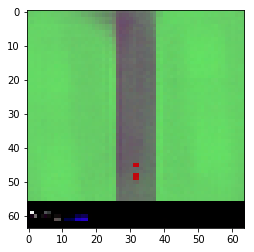

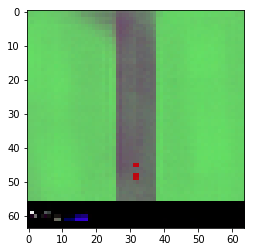

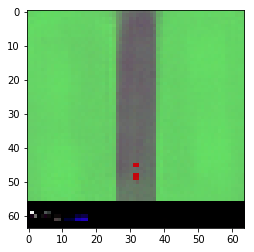

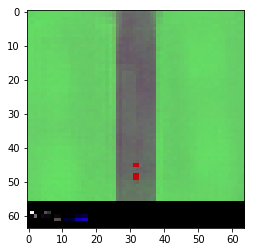

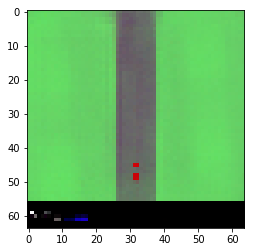

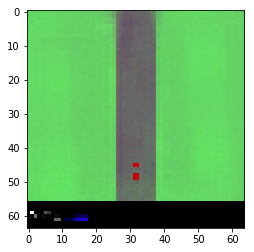

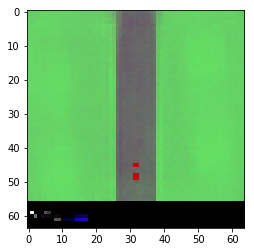

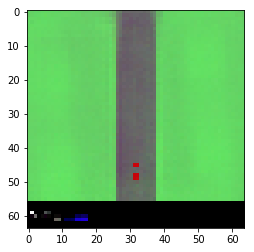

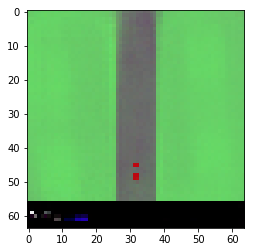

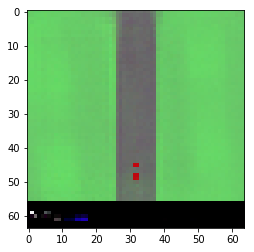

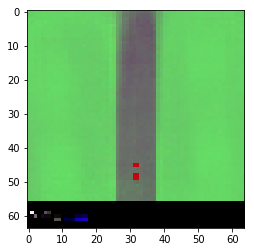

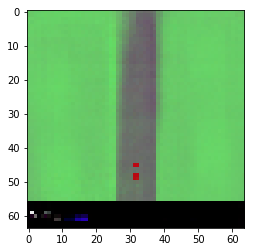

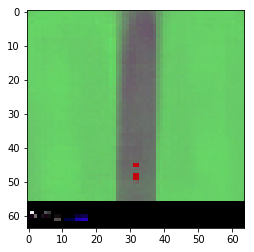

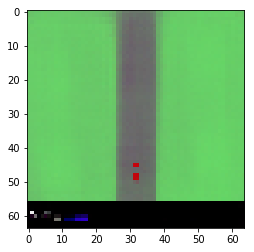

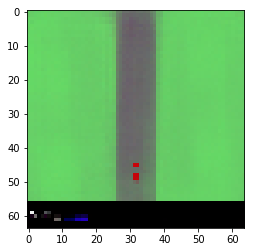

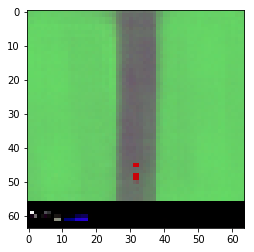

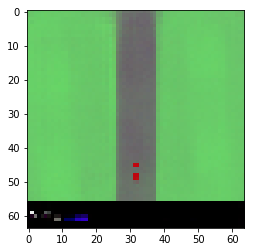

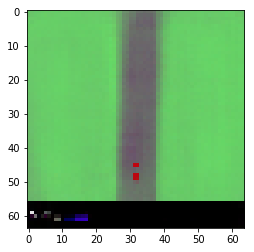

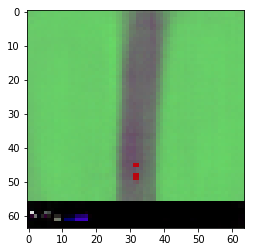

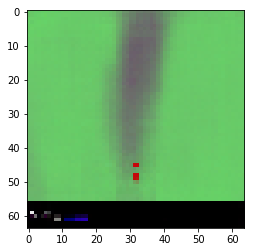

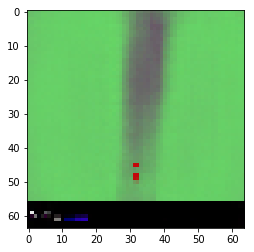

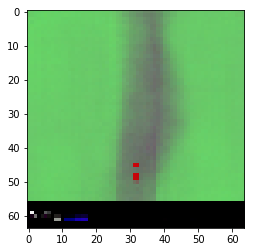

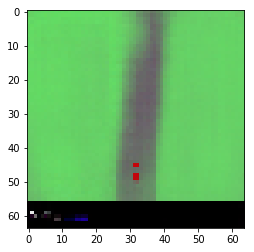

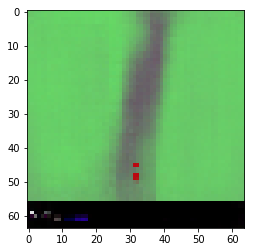

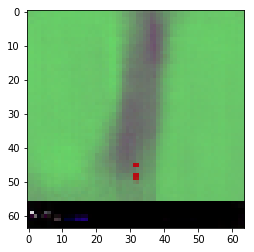

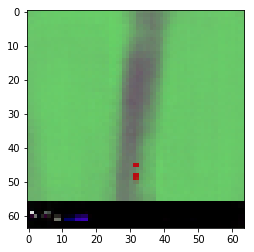

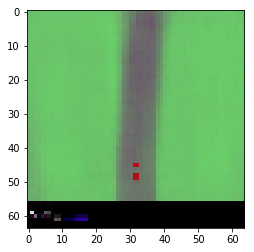

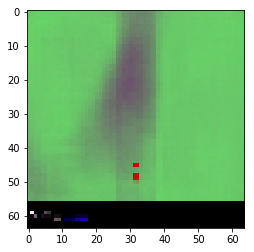

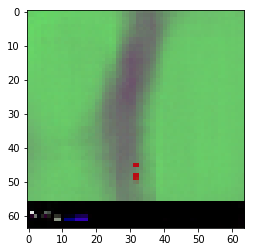

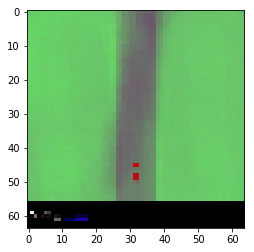

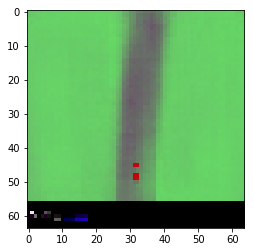

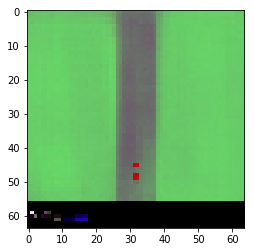

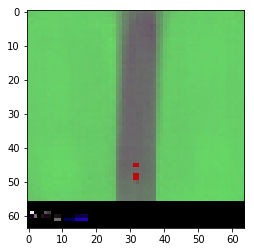

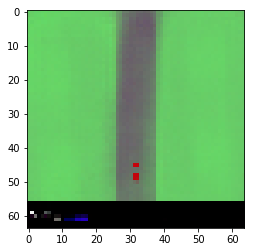

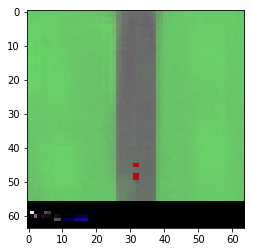

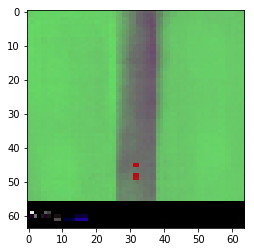

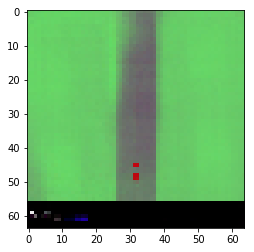

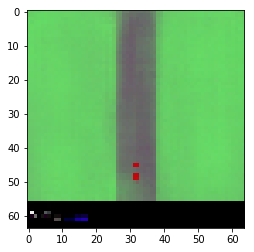

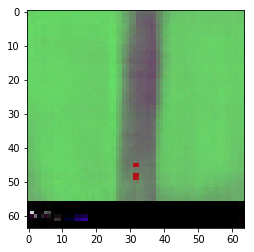

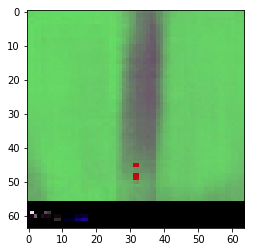

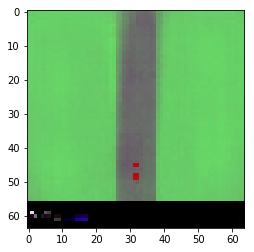

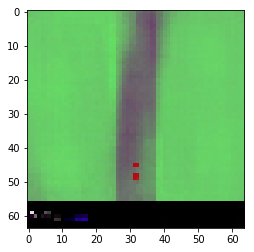

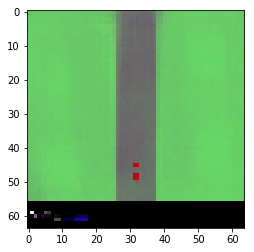

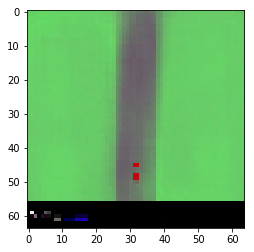

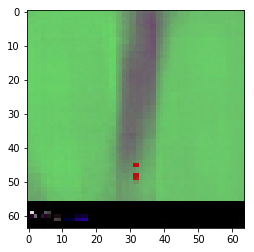

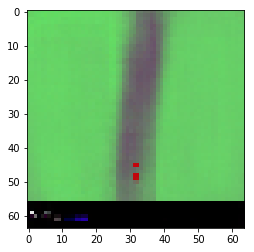

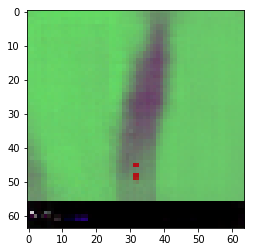

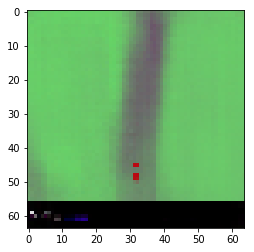

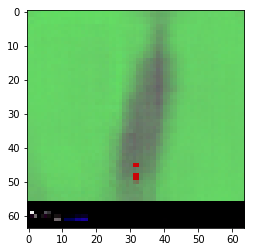

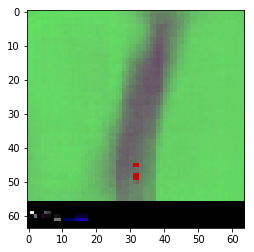

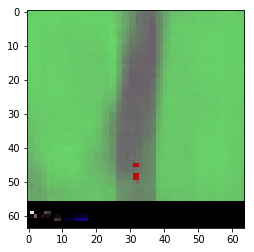

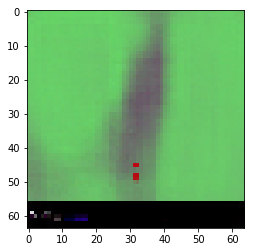

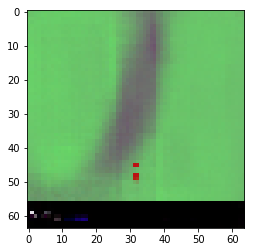

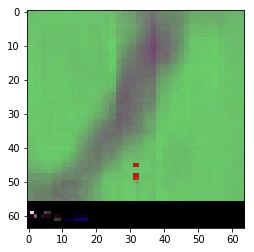

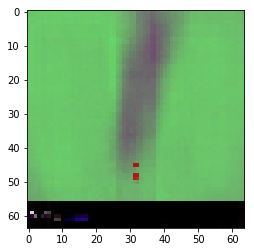

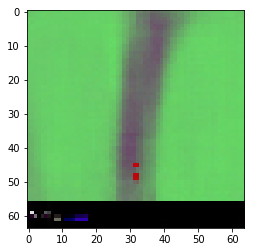

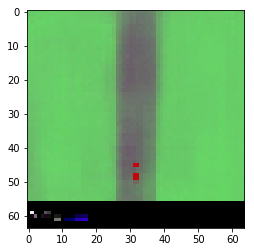

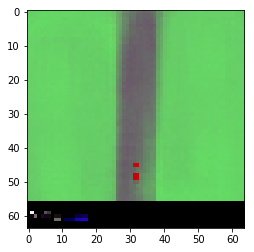

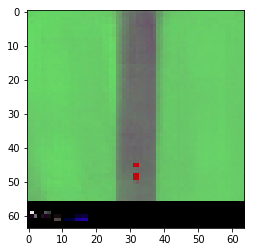

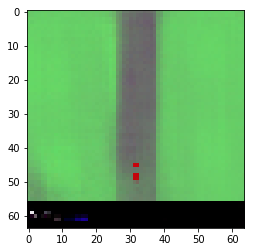

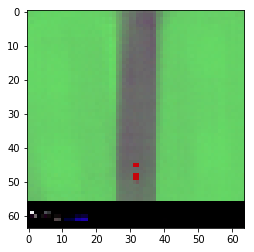

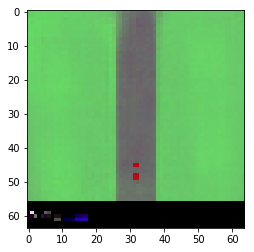

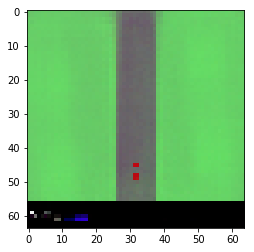

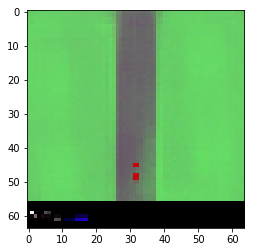

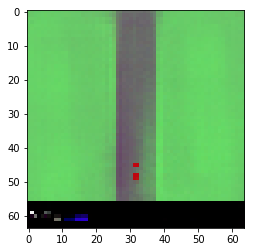

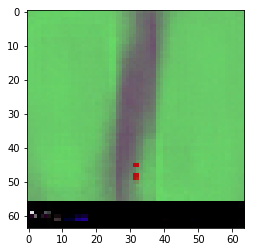

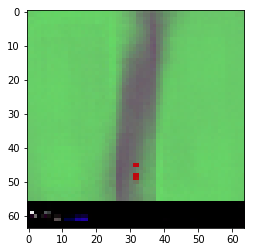

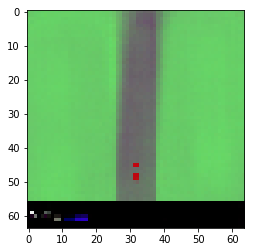

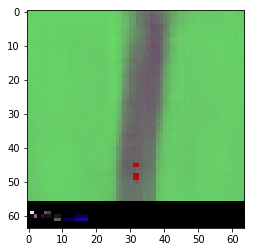

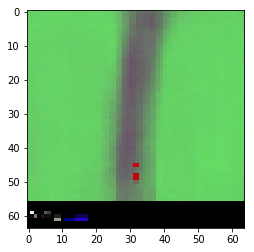

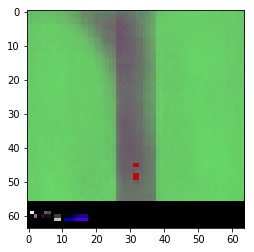

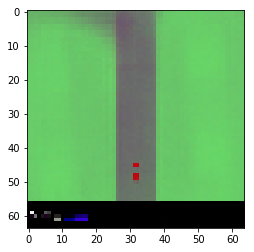

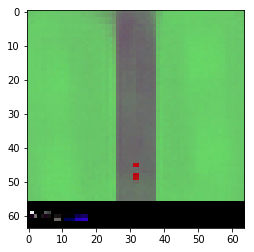

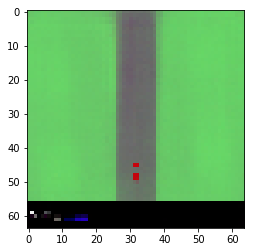

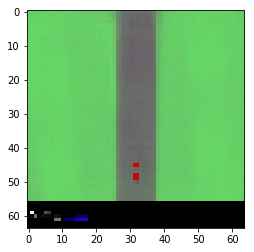

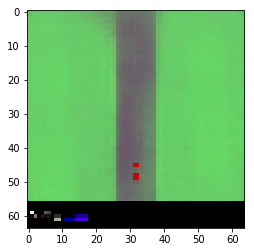

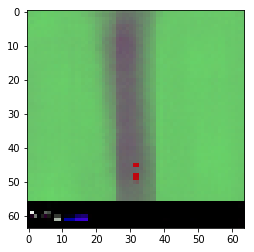

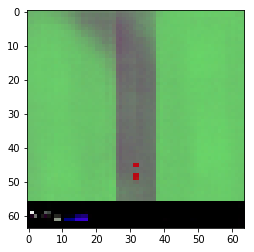

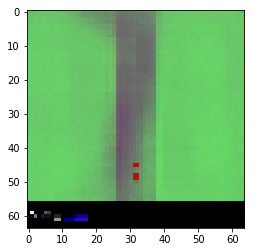

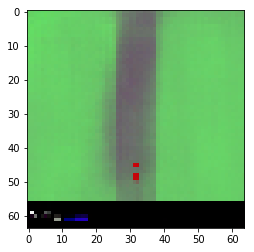

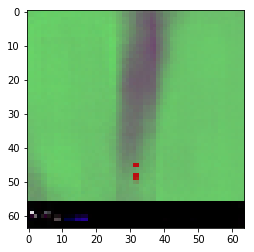

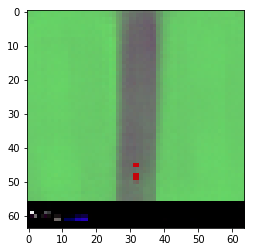

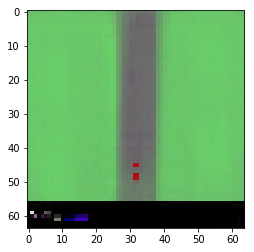

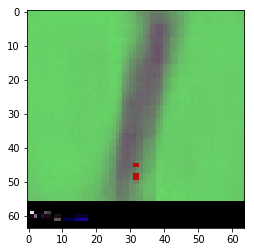

KeyboardInterrupt: 

In [113]:

next_z = obs[70]
# next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
# plt.imshow( next_z_decoded)
# plt.show()

for i in range(200):
#     print(np.array([[next_z]]).shape)
    next_z, chosen_mu, chosen_log_sigma, chosen_pi = sample_next_mdn_output(next_z)

    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
#     next_mu_decoded = vae.decoder.predict(np.array([chosen_mu]))[0]

    next_z = np.concatenate([next_z, [0,1,0]])

#     plt.subplot(211)
    plt.imshow( next_z_decoded)
    plt.show()
#     plt.subplot(221)
#     plt.imshow( next_mu_decoded)
#     plt.show()
    # plt.imshow(next_z_decoded)
    # plt.show()

(34, 299)


/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


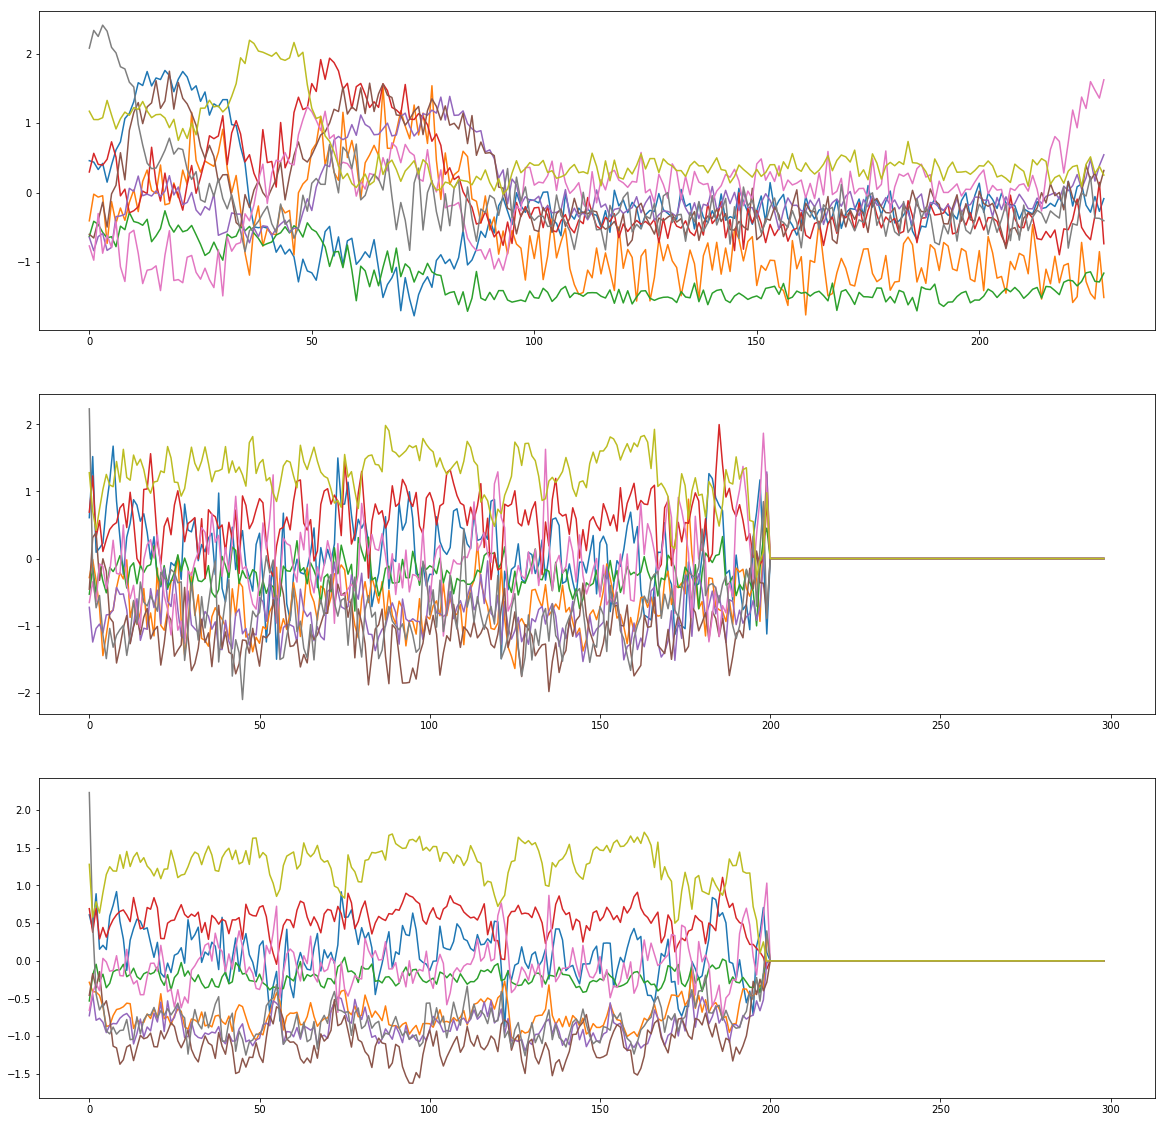

In [114]:
b = np.swapaxes(rnn_output[0],0,1)
print(b.shape)

next_zs = np.zeros(shape = (32,299))
next_mus = np.zeros(shape = (32,299))
# next_z = np.copy(obs)
# print(next_z.shape)
next_z = obs[70]

next_mus[:,0] = next_z[:32]
next_zs[:,0] = next_z[:32]

for i in range(1,200):
    next_z, chosen_mu, chosen_log_sigma, chosen_pi = sample_next_mdn_output(next_z)
    next_mus[:,i] = chosen_mu
    next_zs[:,i] = next_z
    next_z_decoded = vae.decoder.predict(np.array([next_z]))[0]
    
    # plt.imshow(next_z_decoded)
    # plt.show()
    # next_z = np.concatenate([next_z, np.array([0,1,0])])
    
    next_z = np.concatenate([next_z, [0,1,0]])

plt.figure(figsize=(20,20))
for i in [5,10,13,15,16,22, 24, 30, 31]:
    plt.subplot(311)
    plt.plot( b[i,70:])
    plt.subplot(312)
    plt.plot( next_zs[i,:])
    plt.subplot(313)
    plt.plot( next_mus[i,:])
    
# print(next_zs)
    